# Plots without High-K

**To-do List for Figures**
- Make gif of potential gradients with all nitride changing as the applied voltage changes
    - Field plate
    - T gate
- Benchmark IV performance out to larger value (+4V) and compare on a chart
- Benchmark peak field and compare on a chart
- Show channel plot for both field plate and T gate to illustrate when and where the peak field location changes

## Definitions

In [1]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
plt.style.use('seaborn-v0_8-white') # One of the two of these styles will work. not sure why it changes.
#plt.style.use('seaborn-darkgrid')
print(plt.style.available)
import numpy as np

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
def plotFromFlooxs(IVFile, peakFile):
    
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Gate = IVFile[:,0]
    I = IVFile[:,1]

    plt.figure(figsize=[14,7]);
    plt.subplot(1,2,1)
    plt.plot(Gate, I);
    plt.title("IV")
    plt.xlabel("$V_{G} (V)$");
    plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
    plt.grid(True);

    # =============================================
    #                 Peak Field
    # =============================================
    
    peakFile = np.loadtxt(peakFile, delimiter=',')    
    Vds = peakFile[:,0]
    peakField = peakFile[:,1]

    plt.subplot(1,2,2);
    plt.plot(Vds, peakField);
    plt.title("GaN Peak Field")
    plt.xlabel("$V_{DS} (V)$");
    plt.ylabel("Electric Field (V/cm)");
    plt.grid(True);

    return Gate, I, Vds, peakField

def flooxsRead(IVFile):
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Vds = IVFile[:,0]
    I = IVFile[:,1]
    return Vds,I

## Gate voltage

**Field plate**

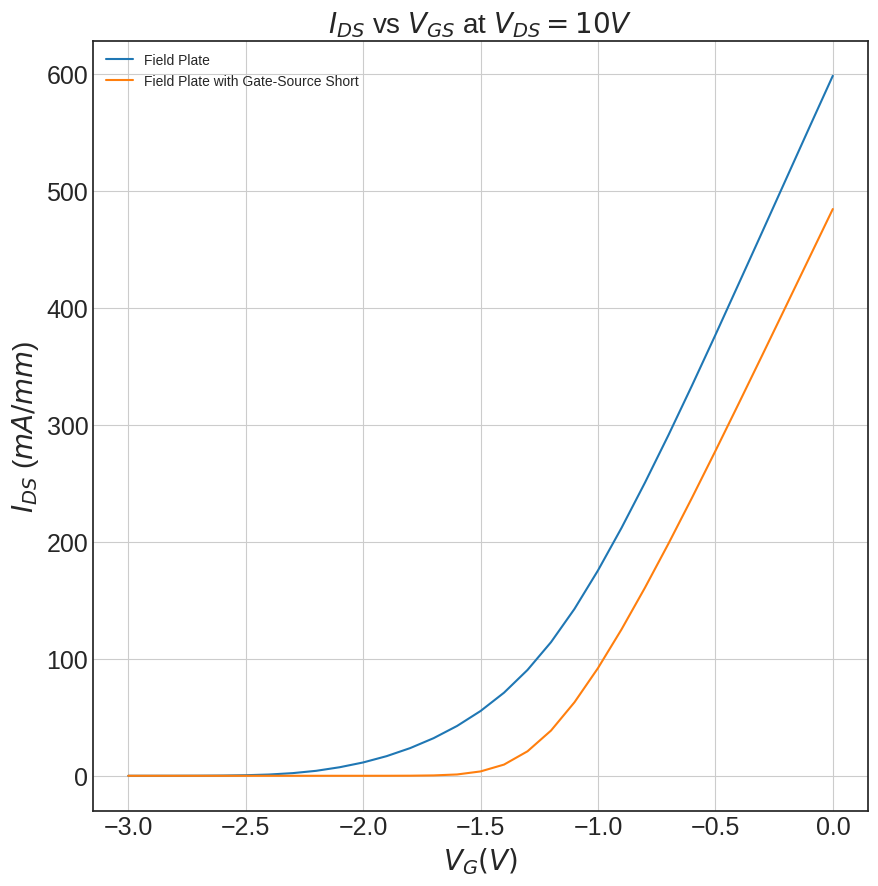

In [3]:
fieldplate_Vgs_OLD, fieldplate_Ids_OLD = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_Vt_OLD.csv")
fieldplate_Vgs, fieldplate_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_Vt.csv")
fieldplate_rad_Vgs, fieldplate_rad_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_rad_Vt.csv")
fieldplate_ox_Vgs, fieldplate_ox_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_ox_Vt.csv")
fieldplate_wrap_Vgs, fieldplate_wrap_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_wrap_Vt.csv")
fieldplate_strike_Vgs, fieldplate_strike_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_strike_Vt.csv")
plt.figure(figsize=[10,10]);
plt.plot(fieldplate_Vgs_OLD, 1000*fieldplate_Ids_OLD, label="Field Plate");
#plt.plot(fieldplateplt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10v$", fontsize=20);
#plt.plot(fieldplate_ox_Vgs, 1000*fieldplate_ox_Ids, label="Field Plate with Nitride");
plt.plot(fieldplate_strike_Vgs, 1000*fieldplate_strike_Ids, label="Field Plate with Gate-Source Short");
#plt.plot(fieldplate_wrap_Vgs, 1000*fieldplate_wrap_Ids, label="Wrapped Field Plate");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10V$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()

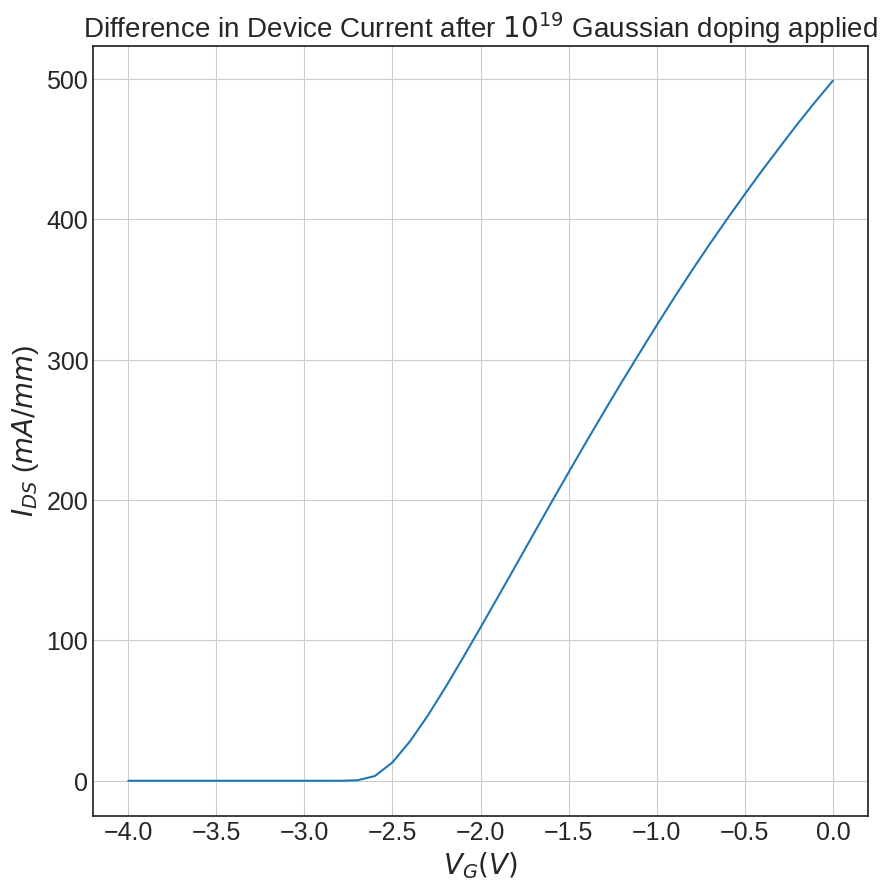

In [4]:

plt.figure(figsize=[10,10]);
plt.plot(fieldplate_Vgs, 1000*(fieldplate_Ids-fieldplate_rad_Ids), label="Field Plate");
plt.title("Difference in Device Current after $10^{19}$ Gaussian doping applied", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
#plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()

**Modified Field plate struct with SiN at the gate**

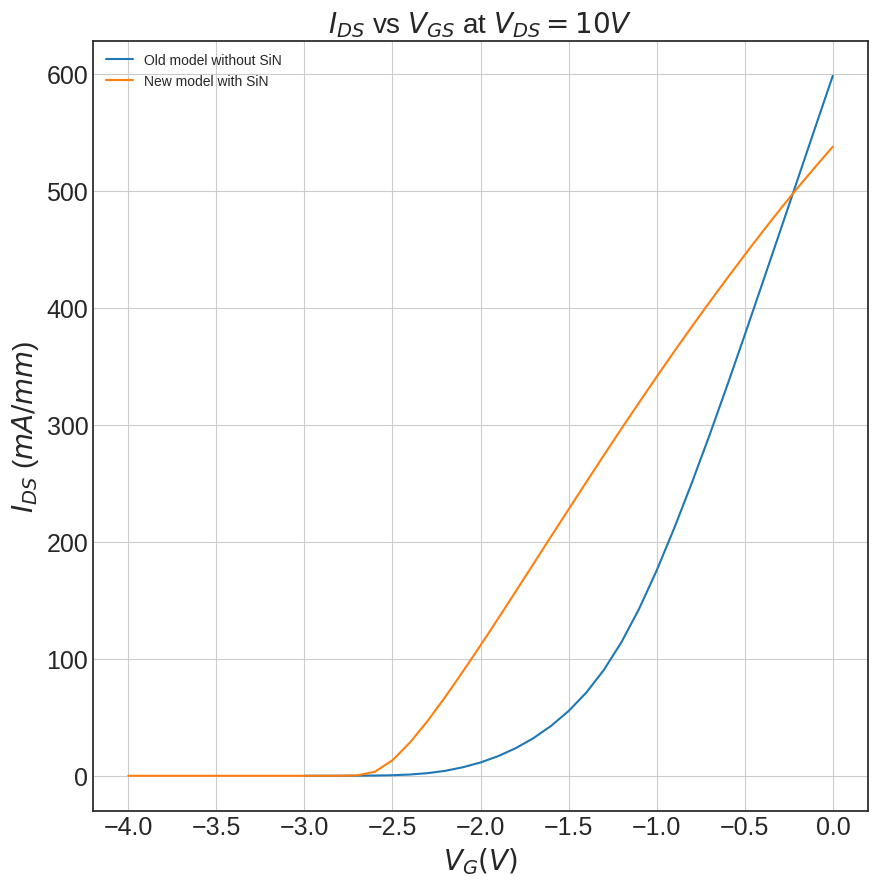

In [5]:
fieldplate_Vgs, fieldplate_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/fieldplate_Vt.csv")
plt.figure(figsize=[10,10]);
plt.plot(fieldplate_Vgs_OLD, 1000*fieldplate_Ids_OLD, label="Old model without SiN");
plt.plot(fieldplate_Vgs, 1000*fieldplate_Ids, label="New model with SiN");

plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10V$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()


## Experimental Data
Uses REF and RF2 from the data provided by Dr. Anderson. The plot immediately below this shows the Vg-Ids curves imposed on the same graph.

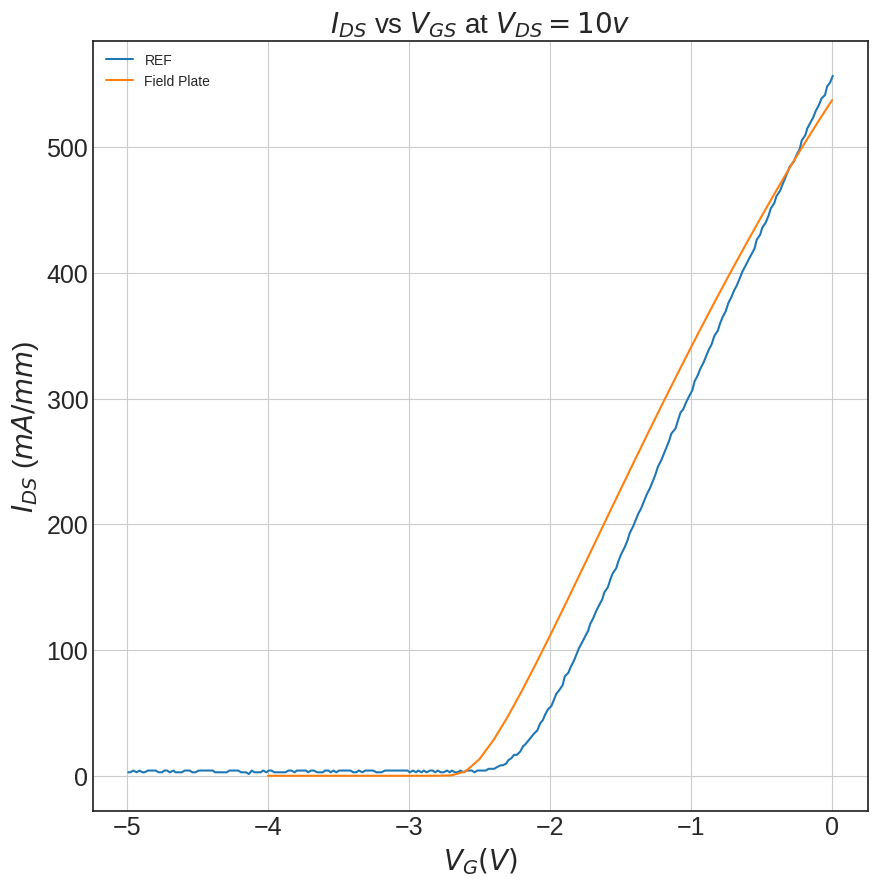

In [6]:
REF_Vgs, REF_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/experimentalREF.csv")
RF1_Vgs, RF1_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/experimentalRF1.csv")
RF2_Vgs, RF2_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/experimentalRF2.csv")
DC1_Vgs, DC1_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/experimentalDC1.csv")
DC2_Vgs, DC2_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/experimentalDC2.csv")
DC3_Vgs, DC3_Ids = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/experimentalDC3.csv")

plt.figure(figsize=[10,10]);
plt.plot(REF_Vgs, 1000*REF_Ids, label="REF");
'''plt.plot(RF1_Vgs, 1000*RF1_Ids, label="RF1");
plt.plot(RF2_Vgs, 1000*RF2_Ids, label="RF2");
plt.plot(DC1_Vgs, 1000*DC1_Ids, label="DC1");
plt.plot(DC2_Vgs, 1000*DC2_Ids, label="DC2");
plt.plot(DC3_Vgs, 1000*DC3_Ids, label="DC3");'''
plt.plot(fieldplate_Vgs, 1000*fieldplate_Ids, label="Field Plate");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10v$", fontsize=20);
plt.xlabel("$V_{G} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()

# Current Collapse

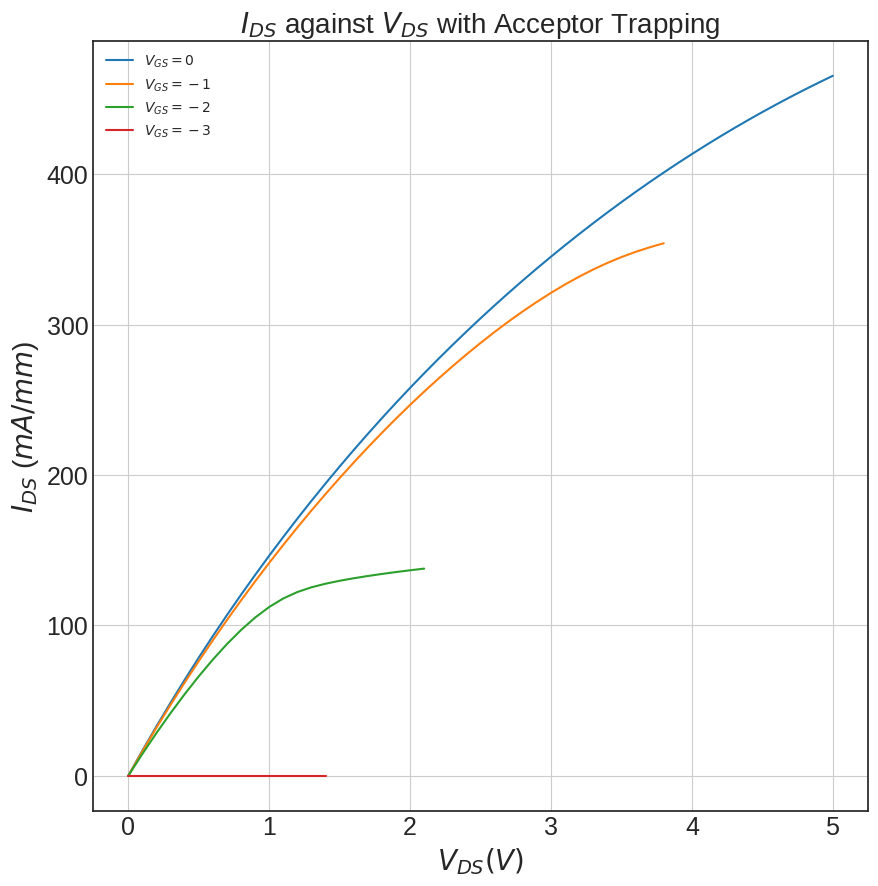

In [7]:
Vd_1, Ids_1 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVplus1.csv")
Vd_2, Ids_2 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVplus2.csv")
Vd_3, Ids_3 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVplus3.csv")
Vd_0, Ids_0 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IV0.csv")
Vd_m1, Ids_m1 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVminus1.csv")
Vd_m2, Ids_m2 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVminus2.csv")
Vd_m3, Ids_m3 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVminus3.csv")
plt.figure(figsize=[10,10]);
plt.plot(Vd_0, Ids_0, label="$V_{GS}=0$");
plt.plot(Vd_m1, Ids_m1, label="$V_{GS}=-1$");
plt.plot(Vd_m2, Ids_m2, label="$V_{GS}=-2$");
plt.plot(Vd_m3, Ids_m3, label="$V_{GS}=-3$");
plt.title("$I_{DS}$ against $V_{DS}$ with Acceptor Trapping", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()


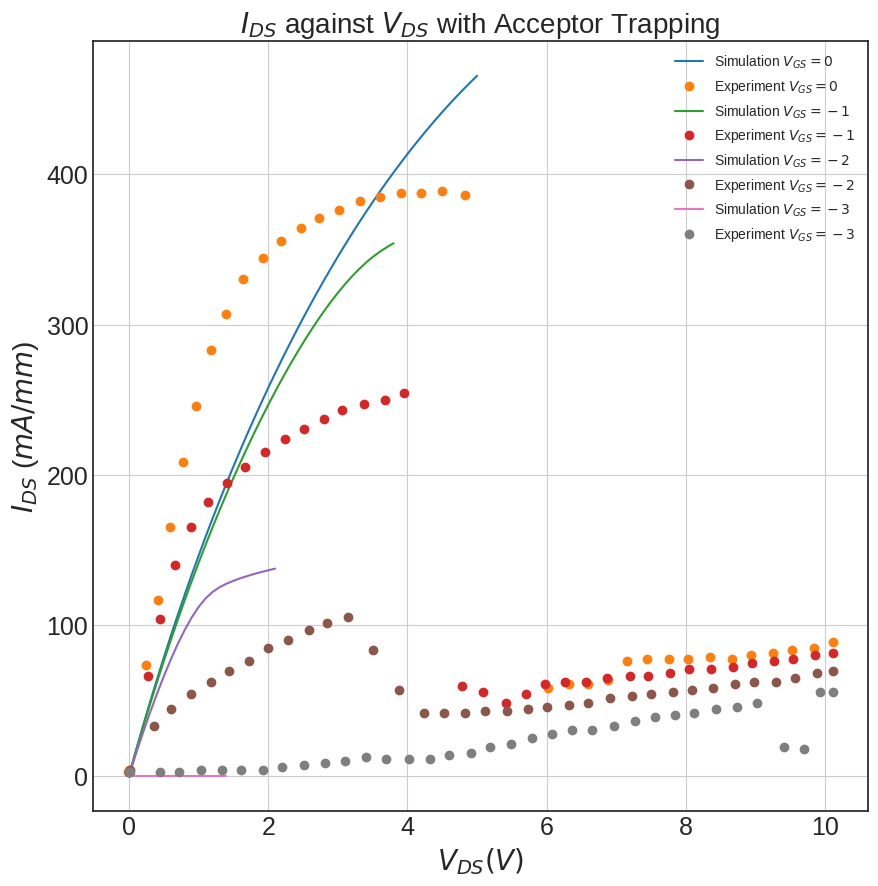

In [8]:
'''
REF_mat = loadmat("/home/staffian/banjo-wombat/allNit/figures/13 REF.mat")

# print(REF_mat.keys())
# print(REF_mat['Expression1'][0])
REF_IV_minus3 = REF_mat['Expression1'][0]
REF_IV_minus2 = REF_mat['Expression1'][1]
REF_IV_minus1 = REF_mat['Expression1'][2]
REF_IV_0 = REF_mat['Expression1'][3]
plt.figure(figsize=[10,10]);
plt.plot(Vd_0, Ids_0, label="Simulation $V_{GS}=0$");
plt.plot(REF_IV_0[:,0], REF_IV_0[:,1], 'o', label="Experiment $V_{GS}=0$");
plt.plot(Vd_1, Ids_1, label="Simulation $V_{GS}=-1$");
plt.plot(REF_IV_minus1[:,0], REF_IV_minus1[:,1], 'o', label="Experiment $V_{GS}=-1$");
plt.plot(Vd_2, Ids_2, label="Simulation $V_{GS}=-2$");
plt.plot(REF_IV_minus2[:,0], REF_IV_minus2[:,1], 'o', label="Experiment $V_{GS}=-2$");
plt.plot(Vd_3, Ids_3, label="Simulation $V_{GS}=-3$");
plt.plot(REF_IV_minus3[:,0], REF_IV_minus3[:,1], 'o', label="Experiment $V_{GS}=-3$");
plt.title("$I_{DS}$ against $V_{DS}$ with Acceptor Trapping", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
'''

DC4_mat = loadmat("/home/staffian/banjo-wombat/allNit/figures/4 DC4.mat")

# print(DC4_mat.keys())
# print(DC4_mat['Expression1'][0])
DC4_IV_minus3 = DC4_mat['Expression1'][1]
DC4_IV_minus2 = DC4_mat['Expression1'][2]
DC4_IV_minus1 = DC4_mat['Expression1'][3]
DC4_IV_0 = DC4_mat['Expression1'][4]
DC4_IV_1 = DC4_mat['Expression1'][5]
DC4_IV_2 = DC4_mat['Expression1'][6]
DC4_IV_3 = DC4_mat['Expression1'][7]
plt.figure(figsize=[10,10]);
'''
plt.plot(Vd_3, Ids_3, label="Simulation $V_{GS}=3$");
plt.plot(DC4_IV_3[:,0], DC4_IV_3[:,1], 'o', label="Experiment $V_{GS}=3$");
plt.plot(Vd_2, Ids_2, label="Simulation $V_{GS}=2$");
plt.plot(DC4_IV_2[:,0], DC4_IV_2[:,1], 'o', label="Experiment $V_{GS}=2$");
plt.plot(Vd_1, Ids_1, label="Simulation $V_{GS}=1$");
plt.plot(DC4_IV_1[:,0], DC4_IV_1[:,1], 'o', label="Experiment $V_{GS}=1$");
'''
plt.plot(Vd_0, Ids_0, label="Simulation $V_{GS}=0$");
plt.plot(DC4_IV_0[:,0], DC4_IV_0[:,1], 'o', label="Experiment $V_{GS}=0$");
plt.plot(Vd_m1, Ids_m1, label="Simulation $V_{GS}=-1$");
plt.plot(DC4_IV_minus1[:,0], DC4_IV_minus1[:,1], 'o', label="Experiment $V_{GS}=-1$");
plt.plot(Vd_m2, Ids_m2, label="Simulation $V_{GS}=-2$");
plt.plot(DC4_IV_minus2[:,0], DC4_IV_minus2[:,1], 'o', label="Experiment $V_{GS}=-2$");
plt.plot(Vd_m3, Ids_m3, label="Simulation $V_{GS}=-3$");
plt.plot(DC4_IV_minus3[:,0], DC4_IV_minus3[:,1], 'o', label="Experiment $V_{GS}=-3$");
plt.title("$I_{DS}$ against $V_{DS}$ with Acceptor Trapping", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();

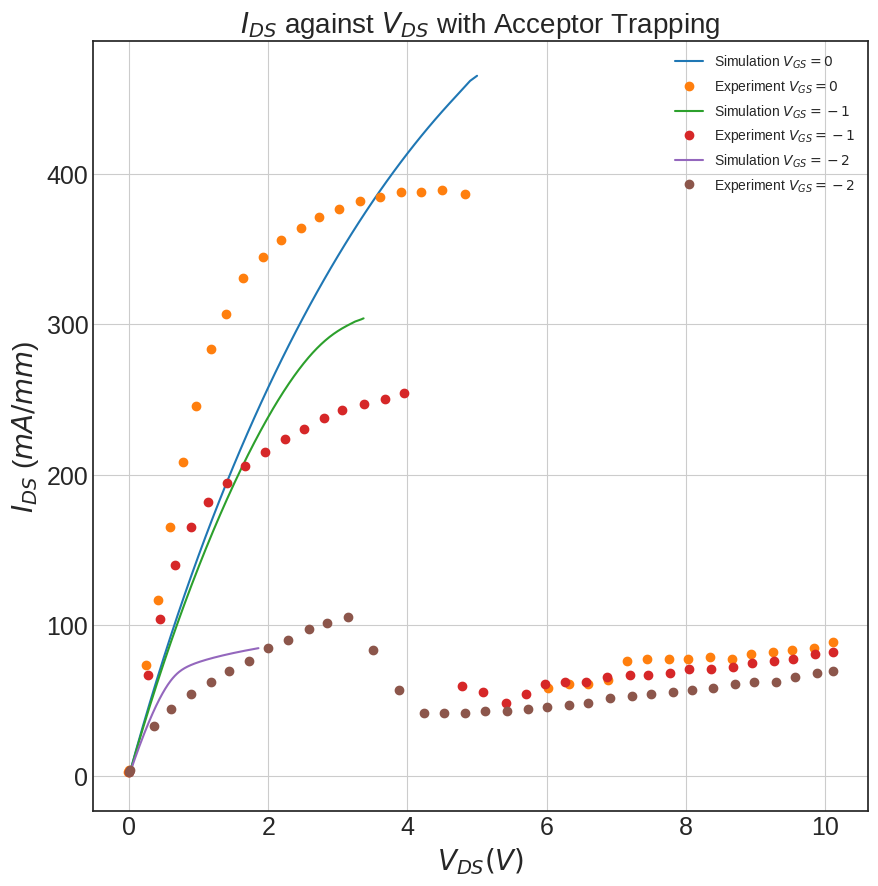

In [10]:
new_Vd_0, new_Ids_0 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/newIV0.csv")
new_Vd_m1, new_Ids_m1 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/newIVminus1.csv")
new_Vd_m2, new_Ids_m2 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/newIVminus2.csv")
# Vd_m3, Ids_m3 = flooxsRead("/home/staffian/banjo-wombat/allNit/figures/IVminus3.csv")

plt.figure(figsize=[10,10]);
plt.plot(new_Vd_0, new_Ids_0, label="Simulation $V_{GS}=0$");
plt.plot(DC4_IV_0[:,0], DC4_IV_0[:,1], 'o', label="Experiment $V_{GS}=0$");
plt.plot(new_Vd_m1, new_Ids_m1, label="Simulation $V_{GS}=-1$");
plt.plot(DC4_IV_minus1[:,0], DC4_IV_minus1[:,1], 'o', label="Experiment $V_{GS}=-1$");
plt.plot(new_Vd_m2, new_Ids_m2, label="Simulation $V_{GS}=-2$");
plt.plot(DC4_IV_minus2[:,0], DC4_IV_minus2[:,1], 'o', label="Experiment $V_{GS}=-2$");
# plt.plot(new_Vd_m3, new_Ids_m3, label="Simulation $V_{GS}=-3$");
# plt.plot(DC4_IV_minus3[:,0], DC4_IV_minus3[:,1], 'o', label="Experiment $V_{GS}=-3$");
plt.title("$I_{DS}$ against $V_{DS}$ with Acceptor Trapping", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();

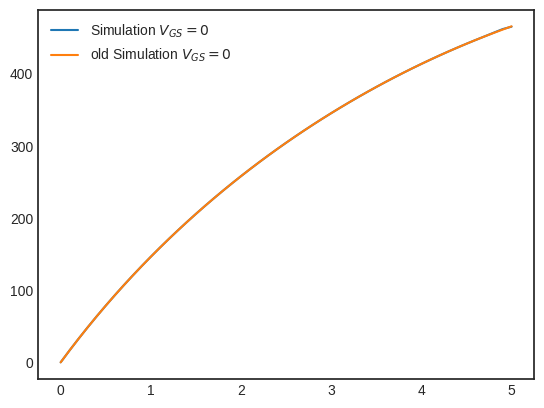

In [15]:
plt.figure();
plt.plot(new_Vd_0, new_Ids_0, label="Simulation $V_{GS}=0$");
plt.plot(Vd_0, Ids_0, label="old Simulation $V_{GS}=0$");
plt.legend();
plt.show()

